In [63]:
# We import the tools needed for data creation. pandas is for data tables, numpy helps with numbers and randomness.
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
# This makes sure we get the same random values every time we run the notebook (useful for testing and sharing).
np.random.seed(42)

# Number of customers
# We’ll create a dataset with 500 rows (each row = one customer).
n_customers = 500

# Simulate data
# We simulate real CRM data using different techniques
df = pd.DataFrame({
    "CustomerID": range(1001, 1001 + n_customers),
    "Industry": np.random.choice(["Tech", "Retail", "Healthcare", "Finance", "Education"], n_customers),
    "TenureMonths": np.random.randint(1, 60, n_customers),
    "LastLoginDaysAgo": np.random.randint(0, 60, n_customers),
    "SupportTickets": np.random.poisson(2, n_customers),
    "AvgUsage": np.round(np.random.uniform(30, 100, n_customers), 2),
    "UsageDropPct": np.round(np.random.uniform(0, 80, n_customers), 2),
    "ContractEndsIn": np.random.randint(0, 24, n_customers)
})

# Add churn with some logic
# We add a new column Churned with a rule:
df["Churned"] = df.apply(
    lambda row: 1 if (row["UsageDropPct"] > 50 and row["LastLoginDaysAgo"] > 30 and row["SupportTickets"] >= 3) else 0,
    axis=1
)

# Show sample
df.head()


,CustomerID,Industry,TenureMonths,LastLoginDaysAgo,SupportTickets,AvgUsage,UsageDropPct,ContractEndsIn,Churned
0,1001,Finance,20,30,1,98.42,24.81,20,0
1,1002,Education,48,39,3,67.23,58.54,18,1
2,1003,Healthcare,25,36,1,39.51,51.25,21,0
3,1004,Education,22,35,2,36.95,33.28,10,0
4,1005,Education,13,23,4,44.62,60.73,15,0


In [64]:
df.tail()

,CustomerID,Industry,TenureMonths,LastLoginDaysAgo,SupportTickets,AvgUsage,UsageDropPct,ContractEndsIn,Churned
495,1496,Tech,55,5,1,30.71,45.69,22,0
496,1497,Healthcare,9,17,3,60.62,24.32,17,0
497,1498,Tech,55,20,4,91.79,25.45,19,0
498,1499,Tech,3,41,0,33.63,76.89,11,0
499,1500,Tech,51,35,2,43.38,71.34,22,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        500 non-null    int64  
 1   Industry          500 non-null    object 
 2   TenureMonths      500 non-null    int64  
 3   LastLoginDaysAgo  500 non-null    int64  
 4   SupportTickets    500 non-null    int64  
 5   AvgUsage          500 non-null    float64
 6   UsageDropPct      500 non-null    float64
 7   ContractEndsIn    500 non-null    int64  
 8   Churned           500 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 35.3+ KB


In [66]:
df.columns

Index(['CustomerID', 'Industry', 'TenureMonths', 'LastLoginDaysAgo',
       'SupportTickets', 'AvgUsage', 'UsageDropPct', 'ContractEndsIn',
       'Churned'],
      dtype='object')

In [67]:
df.shape

(500, 9)

In [68]:
df.dtypes

,0
CustomerID,int64
Industry,object
TenureMonths,int64
LastLoginDaysAgo,int64
SupportTickets,int64
AvgUsage,float64
UsageDropPct,float64
ContractEndsIn,int64
Churned,int64


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,500.0,1250.50000,144.481833,1001.00,1125.750,1250.500,1375.2500,1500.00
TenureMonths,500.0,30.40000,17.396012,1.00,15.750,30.000,47.0000,59.00
LastLoginDaysAgo,500.0,28.83800,17.209651,0.00,13.000,29.000,44.0000,59.00
SupportTickets,500.0,1.94800,1.387496,0.00,1.000,2.000,3.0000,8.00
AvgUsage,500.0,66.38164,20.400178,30.03,48.700,67.895,84.1275,99.98
UsageDropPct,500.0,41.34894,22.149538,0.16,23.725,41.710,60.3100,79.96
ContractEndsIn,500.0,12.46400,6.786222,0.00,7.000,13.000,18.0000,23.00
Churned,500.0,0.07200,0.258747,0.00,0.000,0.000,0.0000,1.00


In [70]:
# Check for missing values
# Shows how many missing values exist per column.
df.isnull().sum()


,0
CustomerID,0
Industry,0
TenureMonths,0
LastLoginDaysAgo,0
SupportTickets,0
AvgUsage,0
UsageDropPct,0
ContractEndsIn,0
Churned,0


In [71]:
# Check for duplicate rows*
# This tells you how many duplicate entries there are.
df.duplicated().sum()


np.int64(0)

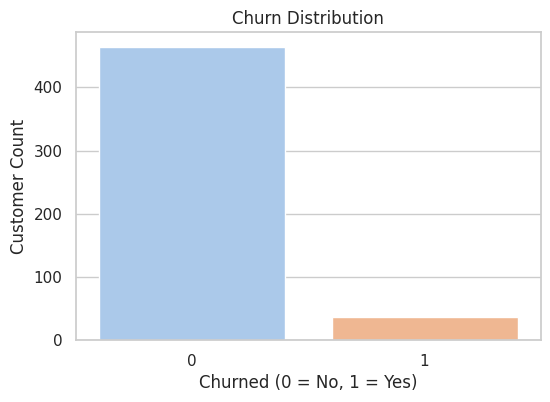

In [72]:
# How many customers churned vs. stayed
# This shows whether your dataset is balanced or not (e.g., 80% stayed vs 20% churned). A balanced dataset is better for training models.

plt.figure(figsize=(6, 4))
sns.countplot(x="Churned", data=df, hue="Churned", palette="pastel", legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churned (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()



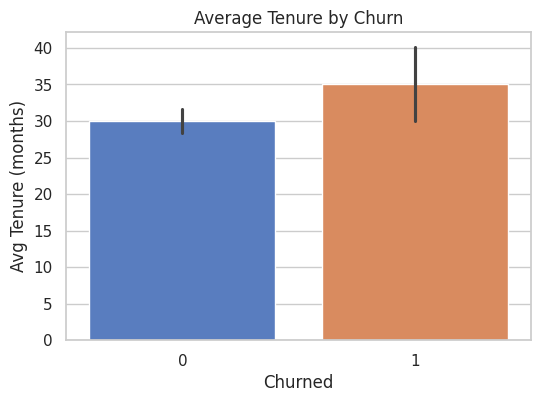

In [73]:
# A – Average Tenure vs Churn
# We explore patterns behind churn
plt.figure(figsize=(6, 4))
sns.barplot(x="Churned", y="TenureMonths", data=df, hue="Churned", palette="muted", legend=False)
plt.title("Average Tenure by Churn")
plt.xlabel("Churned")
plt.ylabel("Avg Tenure (months)")
plt.show()



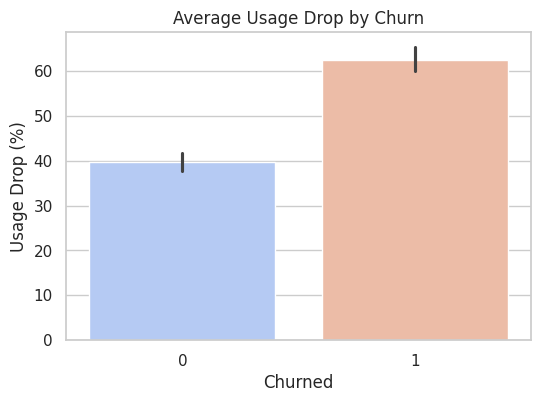

In [74]:
# B – Average Usage Drop vs Churn
plt.figure(figsize=(6, 4))
sns.barplot(x="Churned", y="UsageDropPct", data=df, hue="Churned", palette="coolwarm", legend=False)
plt.title("Average Usage Drop by Churn")
plt.xlabel("Churned")
plt.ylabel("Usage Drop (%)")
plt.show()



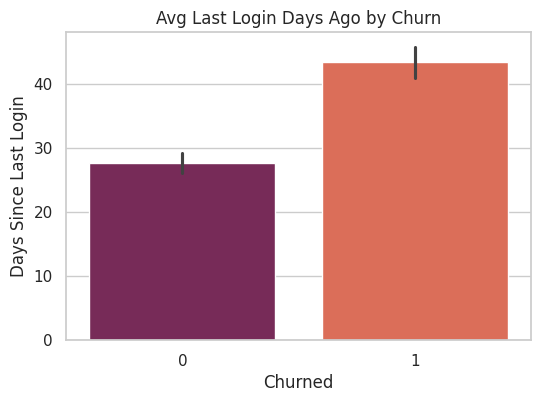

In [75]:
# C – Avg Last Login (in days) by Churn
plt.figure(figsize=(6, 4))
sns.barplot(x="Churned", y="LastLoginDaysAgo", data=df, hue="Churned", palette="rocket", legend=False)
plt.title("Avg Last Login Days Ago by Churn")
plt.xlabel("Churned")
plt.ylabel("Days Since Last Login")
plt.show()



In [76]:
# Select Features + Split Data
# X is your input data (features), y is your target (churn yes/no).
features = ["TenureMonths", "LastLoginDaysAgo", "SupportTickets", "AvgUsage", "UsageDropPct", "ContractEndsIn"]
X = df[features]
y = df["Churned"]


In [77]:
# Split Data into Train & Test Sets
# This ensures we train the model on one part and test it on new data.
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Train a Logistic Regression Model
# Logistic Regression is simple, easy to interpret, and works well for binary outcomes like churn.
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [79]:
# Evaluate Model Performance
# These metrics tell you how well your model performs. For churn prediction, recall is especially important (how many churners we catch).

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.94
Precision: 0.6666666666666666
Recall: 0.2857142857142857


 **Feature Importance**

We use Logistic Regression coefficients to understand which features drive churn.  
Positive values = higher churn risk, negative = lower churn risk.  
This helps explain the model’s logic to business stakeholders.

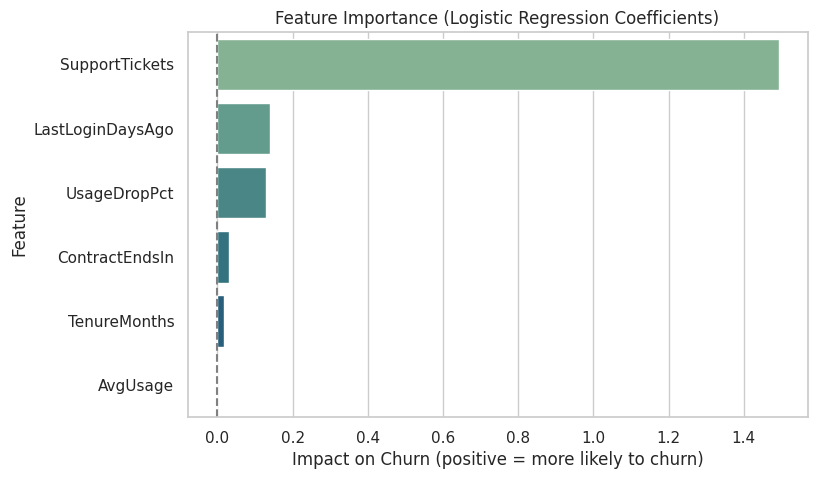

In [80]:
# Feature Importance (Logistic Regression Coefficients)
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Plot with hue to future-proof the code
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=importance_df,
    hue="Feature",     # Add hue
    palette="crest",
    legend=False       # Hide redundant legend
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Impact on Churn (positive = more likely to churn)")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.show()


# Positive values → These features make churn more likely.
# Negative values → These features reduce the chance of churn.
# The bigger the absolute value, the stronger the effect.
# Ex: "A higher number of support tickets and larger usage drop are strong indicators that a customer will churn."

In [81]:
# Predict churn probabilities for all customers
# This gives each customer a score between 0 and 1 — higher = more likely to churn.
# We multiply by 100 to show percentage churn probablity as a percentage %
df["ChurnProbability"] = (model.predict_proba(X)[:, 1] * 100).round(1)


In [82]:
df["ChurnProbability"]

,ChurnProbability
0,0.0
1,23.9
2,0.3
3,0.1
4,9.8
...,...
495,0.0
496,0.0
497,0.1
498,2.0


In [83]:
# We create a Retention Strategy
# First we’ll define: Low Risk = probability < 0.3, Medium Risk = 0.3 to 0.6, High Risk = > 0.6
# Second we'll recommend actions like: "No Action", "Send Promo""Call & Retain"

def retention_action(prob):
    if prob > 0.6:
        return "Call & Retain"
    elif prob > 0.3:
        return "Send Promo"
    else:
        return "No Action"

df["RecommendedAction"] = df["ChurnProbability"].apply(retention_action)



In [84]:
df.head()

,CustomerID,Industry,TenureMonths,LastLoginDaysAgo,SupportTickets,AvgUsage,UsageDropPct,ContractEndsIn,Churned,ChurnProbability,RecommendedAction
0,1001,Finance,20,30,1,98.42,24.81,20,0,0.0,No Action
1,1002,Education,48,39,3,67.23,58.54,18,1,23.9,Call & Retain
2,1003,Healthcare,25,36,1,39.51,51.25,21,0,0.3,No Action
3,1004,Education,22,35,2,36.95,33.28,10,0,0.1,No Action
4,1005,Education,13,23,4,44.62,60.73,15,0,9.8,Call & Retain


In [85]:
# Show top 10 most at-risk customers
df[["CustomerID", "ChurnProbability", "RecommendedAction"]].sort_values(by="ChurnProbability", ascending=False).head(10)


,CustomerID,ChurnProbability,RecommendedAction
480,1481,96.4,Call & Retain
262,1263,95.2,Call & Retain
32,1033,94.2,Call & Retain
20,1021,93.3,Call & Retain
466,1467,92.4,Call & Retain
179,1180,82.9,Call & Retain
28,1029,82.2,Call & Retain
235,1236,77.5,Call & Retain
265,1266,77.1,Call & Retain
340,1341,76.8,Call & Retain


In [86]:
# Export the most relevant final columns to a CSV file
df[["CustomerID", "ChurnProbability", "RecommendedAction"]].to_csv("churn_predictions.csv", index=False)
